In [1]:
import xarray as xr

import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [56]:
# LOAD DATASETS

dataset_d = np.load('dati/mist/datasets/dataset_d.npy')
dataset_n = np.load('dati/mist/datasets/dataset_n.npy')
date_d = np.load('dati/mist/datasets/date_d.npy')
date_n = np.load('dati/mist/datasets/date_n.npy')

italy_mask = np.load('dati/mist/datasets/italy_mask.npy')
data_min = np.load('dati/mist/datasets/data_min.npy')
data_max = np.load('dati/mist/datasets/data_max.npy')

# abs_new2_baseline_d = np.load('dati/mist/datasets/abs_new2_baseline_d.npy')
# abs_new2_baseline_n = np.load('dati/mist/datasets/abs_new2_baseline_n.npy')
# # turn in nans the values that are outside italy_mask (thus, it removes the zeros before calculating min and max)
# abs_new2_baseline_d = np.where(italy_mask, abs_new2_baseline_d, np.nan)
# abs_new2_baseline_n = np.where(italy_mask, abs_new2_baseline_n, np.nan)
# # find the min and max of the baseline, then normalize the baseline values between -1 and 1
# b_data_min = min(np.nanmin(abs_new2_baseline_d), np.nanmin(abs_new2_baseline_n))
# b_data_max = max(np.nanmax(abs_new2_baseline_d), np.nanmax(abs_new2_baseline_n))
# print(f"b_data_min: {b_data_min}, b_data_max: {b_data_max}")
# abs_new2_baseline_d = 2 * ((abs_new2_baseline_d - b_data_min) / (b_data_max - b_data_min)) - 1
# abs_new2_baseline_n = 2 * ((abs_new2_baseline_n - b_data_min) / (b_data_max - b_data_min)) - 1

In [39]:
print(dataset_d.shape, dataset_n.shape, date_d.shape, date_n.shape, italy_mask.shape, data_min.shape, data_max.shape)
# (7815, 256, 256) (7817, 256, 256) (7815,) (7817,) (256, 256) () ()

(7815, 256, 256) (7817, 256, 256) (7815,) (7817,) (256, 256) () ()


In [64]:
#Split the datasets into 4 parts large 128x128

def split_dataset(dataset, size=128):
    """Split a dataset into four parts."""
    return (
        dataset[:, :size, :size],  # NW
        dataset[:, :size, size:],  # NE
        dataset[:, size:, :size],  # SW
        dataset[:, size:, size:]   # SE
    )

def split_mask(mask, size=128):
    """Split a mask into four parts."""
    return (
        mask[:size, :size],  # NW
        mask[:size, size:],  # NE
        mask[size:, :size],  # SW
        mask[size:, size:]   # SE
    )

# Split the datasets into 4 parts of size 128x128
dataset_d_NW, dataset_d_NE, dataset_d_SW, dataset_d_SE = split_dataset(dataset_d)
dataset_n_NW, dataset_n_NE, dataset_n_SW, dataset_n_SE = split_dataset(dataset_n)
italy_mask_NW, italy_mask_NE, italy_mask_SW, italy_mask_SE = split_mask(italy_mask)

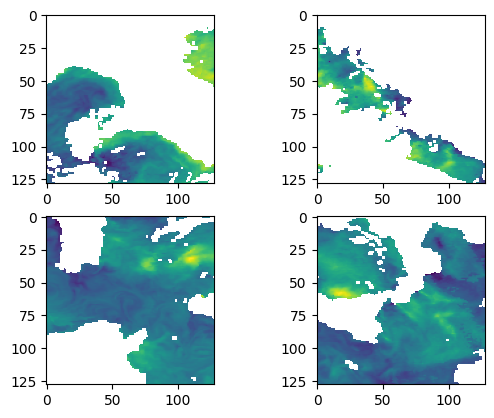

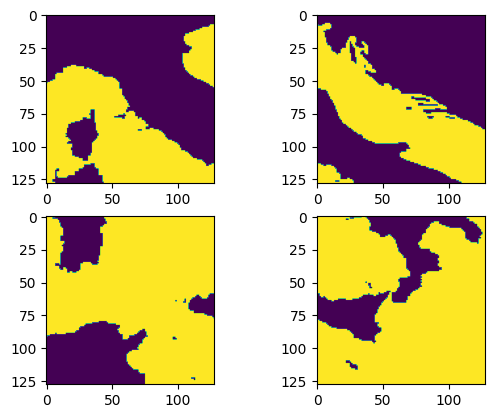

In [65]:
# plot the 4 parts of the first image in the dataset
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(dataset_d_NW[0])
axs[0, 1].imshow(dataset_d_NE[0])
axs[1, 0].imshow(dataset_d_SW[0])
axs[1, 1].imshow(dataset_d_SE[0])
plt.show()

# plot the 4 parts of the mask
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(italy_mask_NW)
axs[0, 1].imshow(italy_mask_NE)
axs[1, 0].imshow(italy_mask_SW)
axs[1, 1].imshow(italy_mask_SE)
plt.show()